# **Predicting Housing Prices in California**

## **Introduction**

This project aims to predict housing prices in california, using a linear regression model.



### **Problem Statement**

The goal of this project is to develop a predictive model for estimating housing prices in California using available demographic, geographic, and property-related features. By leveraging linear regression and data analysis techniques, the project aims to identify key factors influencing house values and provide accurate price predictions for new or unseen properties. 

### **Dataset**

This project uses "California Housing Prices" (2017) by Cam Nugent:

[Download From Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

## **Approach**

Correct implementation of a predictive model requires following some critical data analysis steps:
- Exploratory Data Analysis
- Cleaning and Preprocessing Data
- Train / Test Split 
- Model Training
- Model Testing & Evaluation

After analyzing data and building a linear regression model, the possible correlations between data groups can be further inspected, to explain the tendencies in data groups.




In [165]:
# IMPORTING REQUIRED LIBRARIES

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
# IMPORTING DATASET, SELECTING FEATURES AND TARGET VARIABLE

features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
           'population', 'households', 'median_income', 'ocean_proximity']

target = 'median_house_value'

df = pd.read_csv("dataset.csv") 

X = df[features]
y = df[target]

# HANDLING CATEGORICAL VALUES (OCEAN PROXIMITY)

X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

#### **Exploratory Data Analysis**

In [167]:
df.head(df.size) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Inspecting the dataset information, it is seen that there is only a small amount of missing values in the total_bedrooms column of the dataset. 

To get ahead of this issue, the values need to be imputed. Missing values will be replaced by the median of the data group.

In [169]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Looking at the second and third quartiles of the median_house_value data, we can see that the housing prices have a tendency to stay between $200,000 and $300,000.

#### **Train / Test Split**

**80%** of the data will be used for **training** linear regression model. Remaining amount will be used in testing the trained model.

#### **Model Training**

Predictions will be based on numerous factors in following categories:
- Geographic (longitude, latitude, distance to the ocean)
- Property related (room count, bedroom count)
- Demographic (household count, average income, average housing age and population of the region)

In [170]:
# TRAIN / TEST SPLIT AND DATA PREPROCESSING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train_imputed)

X_test_imputed = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)

# MODEL TRAINING
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# MODEL EVALUATION
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2) Score: {r2:.4f}")

Mean Squared Error (MSE): 4904409297.41
R-squared (R^2) Score: 0.6257


#### **Model Testing & Evaluation**

From testing trained linear regression model, the following results have been gathered:

- Mean Squared Error (MSE): 4904409297.41
- R-squared (R^2) Score: 0.6257

An R^2 score of 0.626 indicates that this trained linear regression model is suitable for the dataset.
However, using a different and stronger prediction model can probably generate better predictions and a better R^2 score. 

Additionally, a mean squared error of 4904409297.41 suggests that there are many values that are far from the predicted values.

These calculations show that linear regression might predict housing values to a certain extent. However, since there are many factors involved in pricing a house, it might not be the best model for upmost precision.

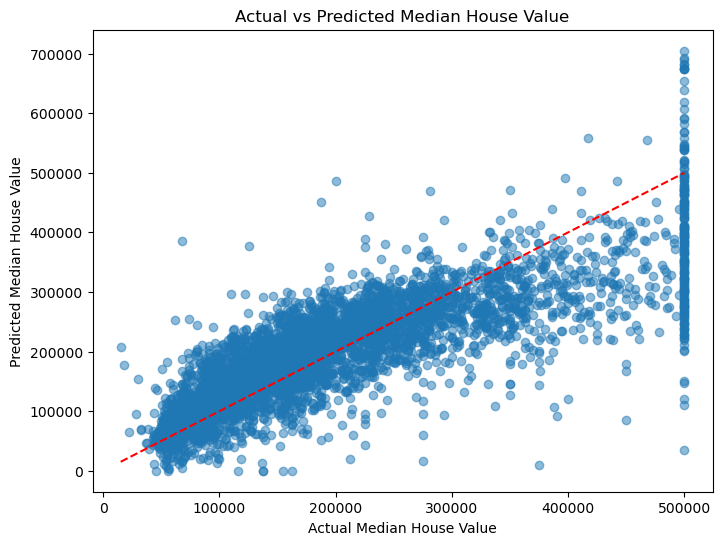

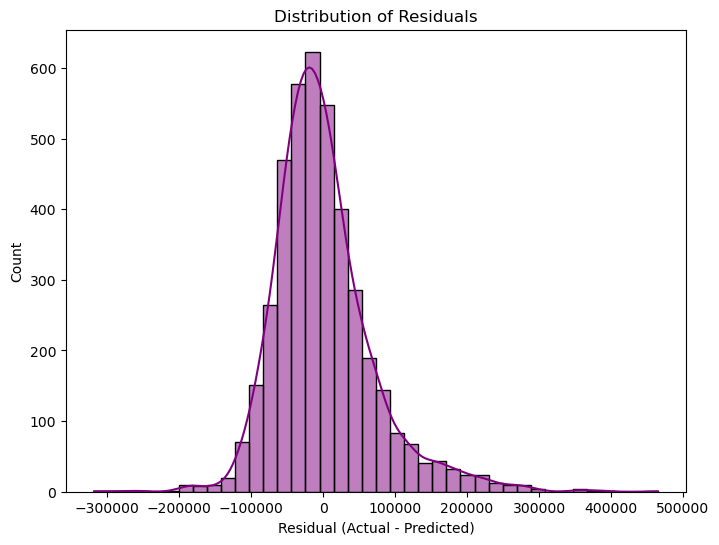

In [171]:
# ACTUAL VS PREDICTED VALUES PLOTS

y_pred = np.maximum(y_pred, 0)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


plt.figure(figsize=(8,6))
residuals = y_test - y_pred
sns.histplot(residuals, bins=40, kde=True, color='purple')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.show()

#### **Interpreting Results** 
Visualized data have shown that there is an unusual amount of houses priced around $500,000 dollars. To interpret this properly, correlations between data groups need to be inspected thoroughly.

Number of high price houses (top 5%): 1032
Threshold for high price: $489810.00


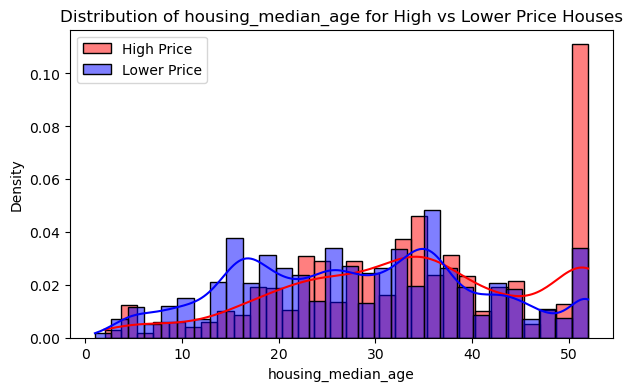

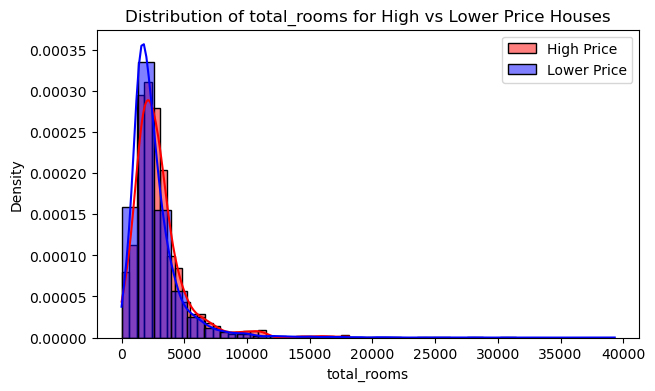

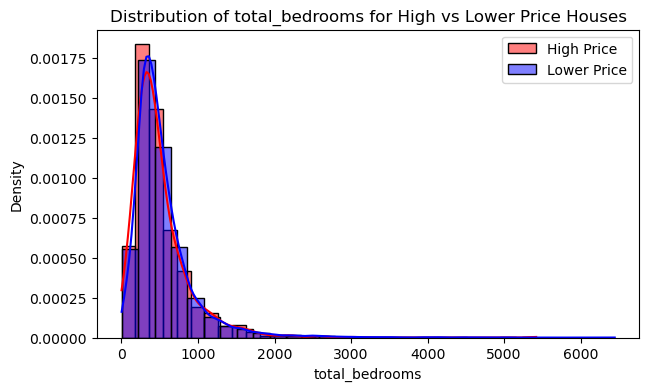

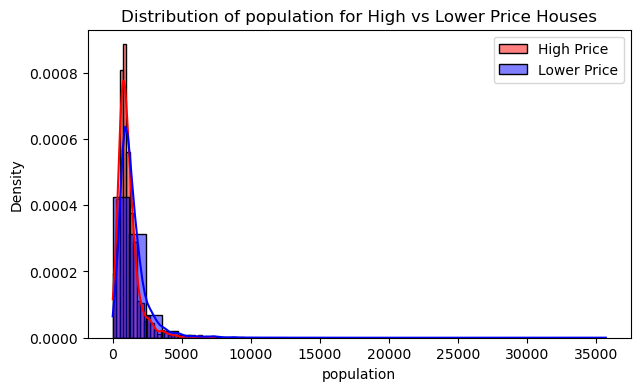

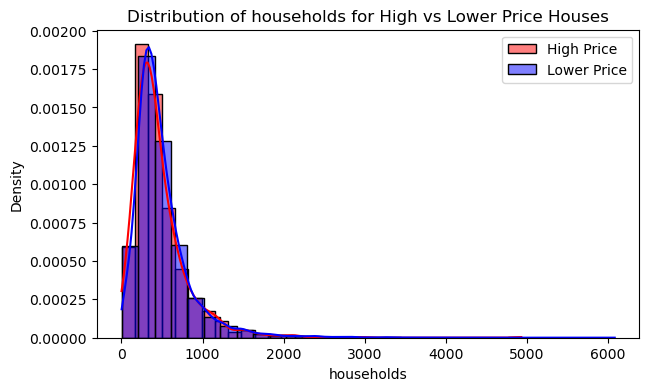

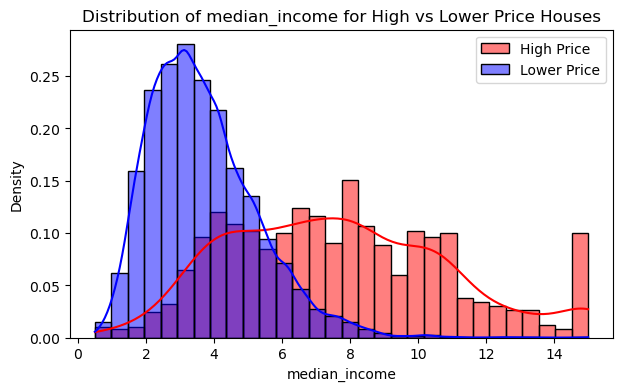

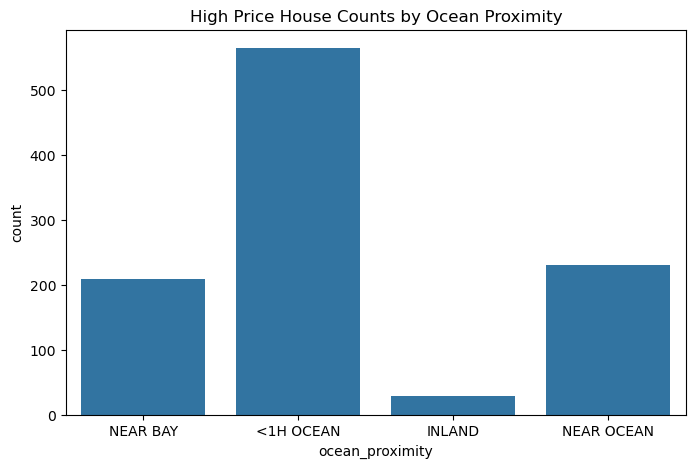

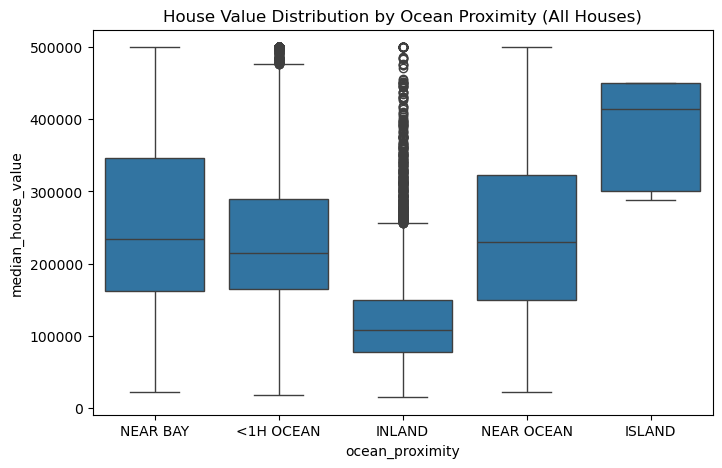

In [172]:
# HIGH PRICE HOUSES ANALYSIS
threshold = df['median_house_value'].quantile(0.95)
high_price_df = df[df['median_house_value'] >= threshold]
low_price_df = df[df['median_house_value'] < threshold]

print(f"Number of high price houses (top 5%): {len(high_price_df)}")
print(f"Threshold for high price: ${threshold:.2f}")

# FEATURE DISTRIBUTION - LOW VS HIGH PRICED HOUSES
for col in ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']:
    plt.figure(figsize=(7,4))
    sns.histplot(high_price_df[col], color='red', label='High Price', kde=True, stat='density', bins=30)
    sns.histplot(low_price_df[col], color='blue', label='Lower Price', kde=True, stat='density', bins=30)
    plt.title(f'Distribution of {col} for High vs Lower Price Houses')
    plt.legend()
    plt.show()

# OCEAN PROXIMITY ANALYSIS
plt.figure(figsize=(8,5))
sns.countplot(x='ocean_proximity', data=high_price_df)
plt.title('High Price House Counts by Ocean Proximity')
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('House Value Distribution by Ocean Proximity (All Houses)')
plt.show()

Distribution of housing age and housing prices indicate that there is a **spike of high prices** when a house is **50 years (or more) old.** Additionally, ocean proximity box plots suggest that there might be a link between housing prices and location of housing. However, correlation between ocean proximity and housing prices is ambiguous, as there is more data needed for a clear conclusion.

## Conclusion

Foreseeing housing prices through a prediction model like linear regression can be one of the options to go, if the project dataset contains clear, usable data. However, we should not have high expectations on this model, as different, stronger models are prefferred and perform better, for the case of real estate market.